[nltk_data] Downloading package punkt to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing category: Luxury_Beauty
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far: 30000
Processing chunk: Total rows processed so far: 40000


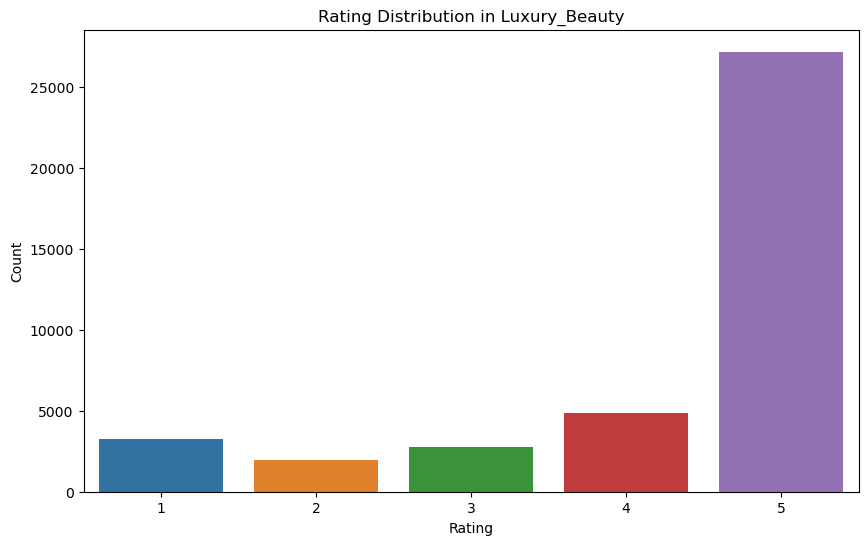

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


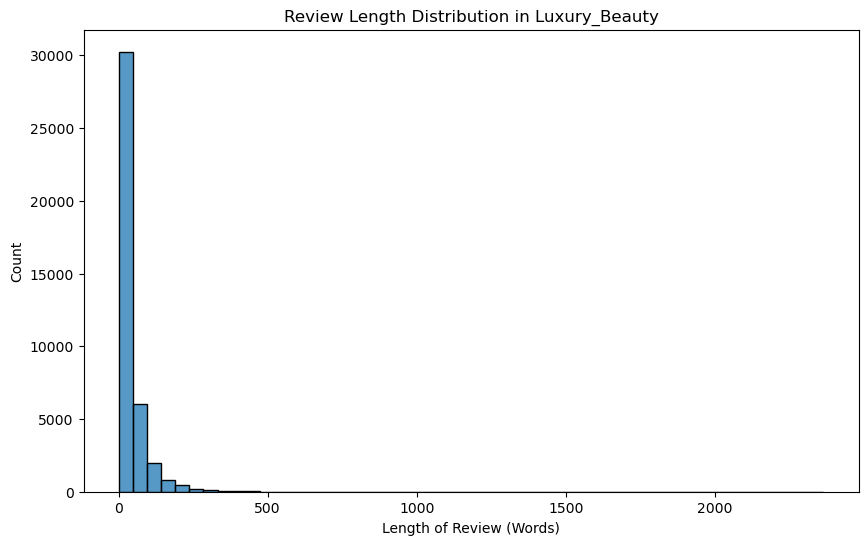

Most common words in reviewText: [('product', 13406), ('hair', 11052), ('great', 9051), ('love', 9048), ('use', 8339), ('color', 8060), ('skin', 7961), ('like', 7938), ('good', 5662), ('one', 5645)]
Most common words in summary: [('stars', 10503), ('five', 8397), ('great', 4338), ('product', 2979), ('love', 2829), ('good', 1920), ('color', 1653), ('best', 1631), ('hair', 1168), ('four', 1127)]
Most common characters in reviewText: [(' ', 1545038), ('e', 719644), ('t', 612509), ('i', 531065), ('o', 504807), ('a', 500513), ('s', 434130), ('n', 391856), ('r', 376444), ('h', 316763)]
Most common characters in summary: [(' ', 125767), ('e', 81974), ('t', 69805), ('s', 61695), ('a', 56619), ('r', 56359), ('o', 56003), ('i', 54463), ('n', 34266), ('l', 31958)]
Processing category: AMAZON_FASHION
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far

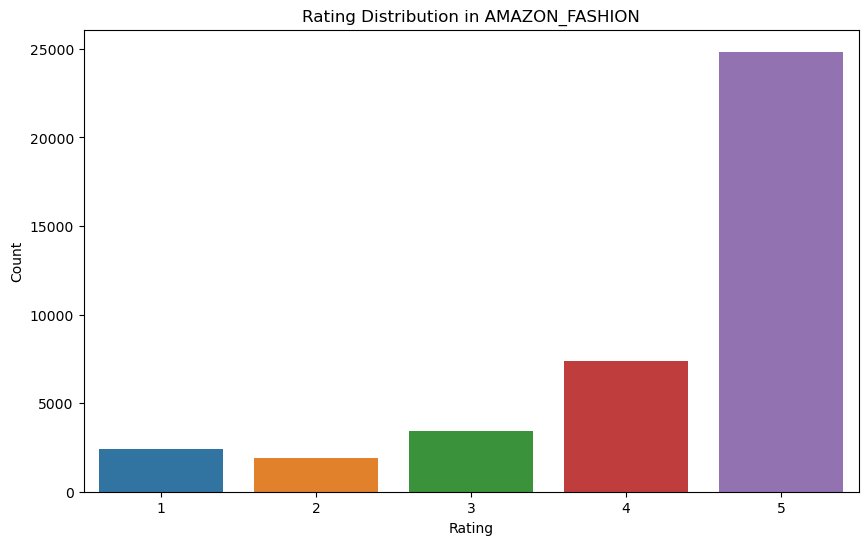

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


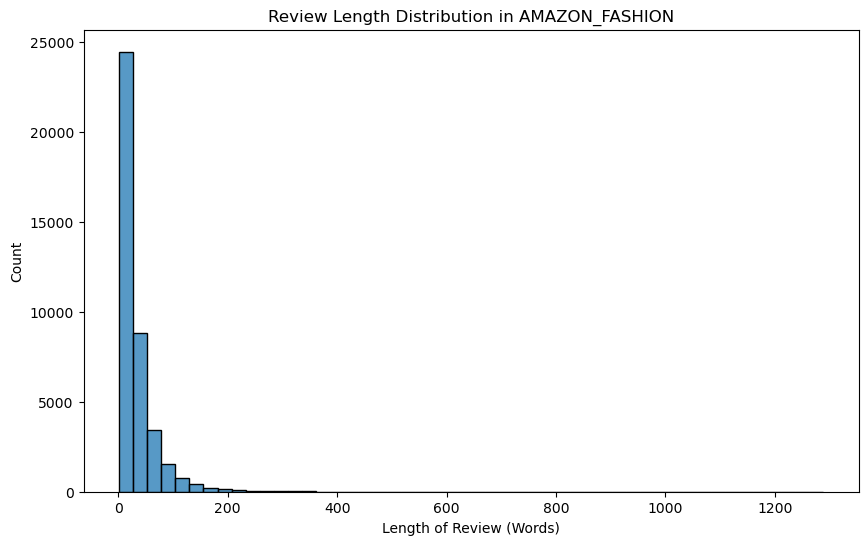

Most common words in reviewText: [('great', 9432), ('fit', 8098), ('good', 6371), ('size', 6074), ('like', 4915), ('shoes', 4803), ('well', 4742), ('love', 4724), ('would', 4639), ('wear', 4341)]
Most common words in summary: [('stars', 11479), ('five', 8042), ('great', 4890), ('good', 2529), ('four', 2141), ('love', 1677), ('hat', 1467), ('fit', 1350), ('perfect', 1143), ('quality', 1069)]
Most common characters in reviewText: [(' ', 1225304), ('e', 633037), ('t', 513362), ('a', 396584), ('o', 385790), ('i', 365748), ('s', 329845), ('r', 298745), ('h', 283485), ('n', 282519)]
Most common characters in summary: [(' ', 124779), ('e', 85866), ('t', 74520), ('s', 62094), ('a', 58918), ('r', 55791), ('o', 51501), ('i', 46208), ('n', 29564), ('l', 28289)]
Processing category: Clothing_Shoes_and_Jewelry
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows process

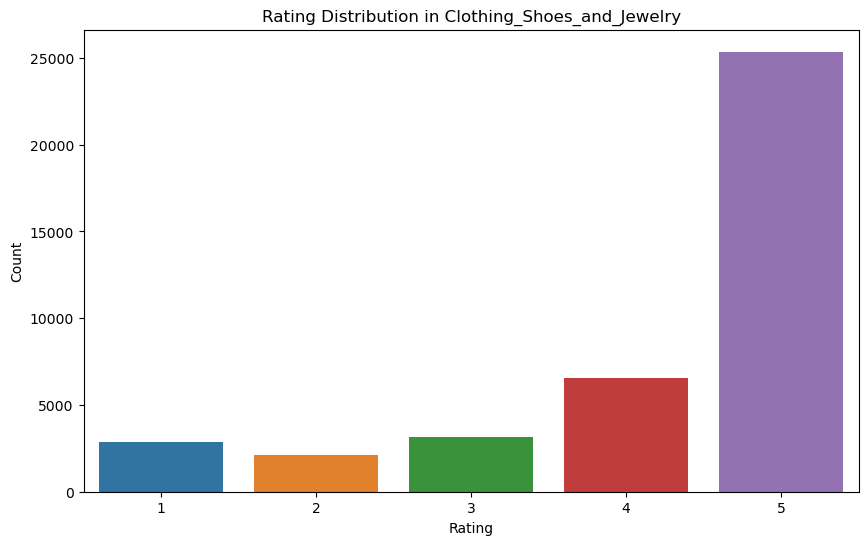

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


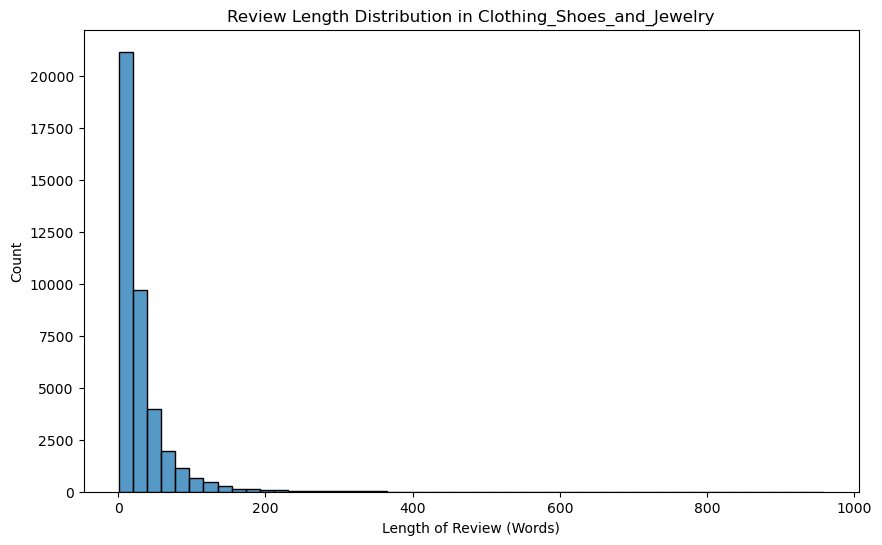

Most common words in reviewText: [('great', 8871), ('fit', 8310), ('size', 8092), ('shoes', 7482), ('love', 6236), ('like', 5403), ('good', 5300), ('wear', 5262), ('comfortable', 4685), ('pair', 4193)]
Most common words in summary: [('stars', 12137), ('five', 8907), ('great', 4211), ('love', 2145), ('shoes', 1998), ('four', 1934), ('good', 1914), ('fit', 1554), ('perfect', 1141), ('comfortable', 1112)]
Most common characters in reviewText: [(' ', 1161880), ('e', 604023), ('t', 470860), ('a', 376698), ('o', 371834), ('i', 338593), ('s', 314079), ('r', 287874), ('h', 265620), ('n', 262967)]
Most common characters in summary: [(' ', 120248), ('e', 85743), ('t', 68320), ('s', 64158), ('a', 55995), ('r', 52939), ('o', 51257), ('i', 44514), ('l', 28605), ('n', 27444)]
Processing category: All_Beauty
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed s

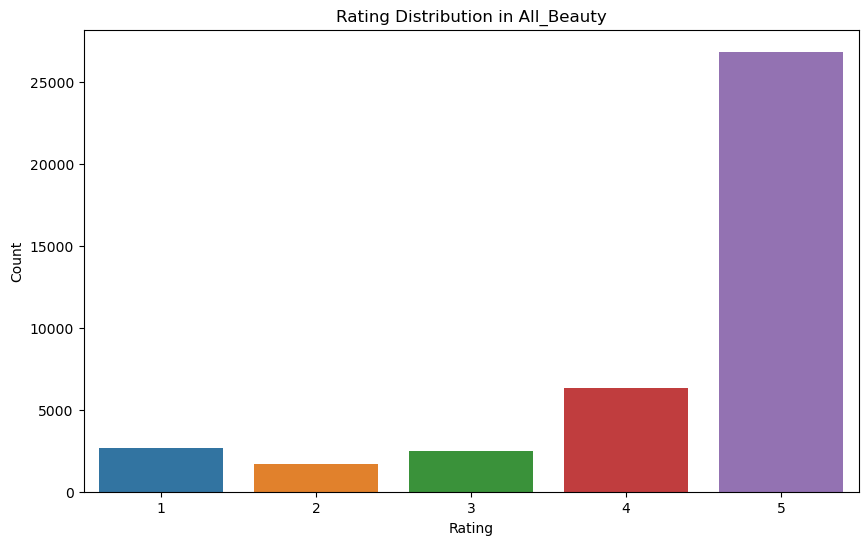

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


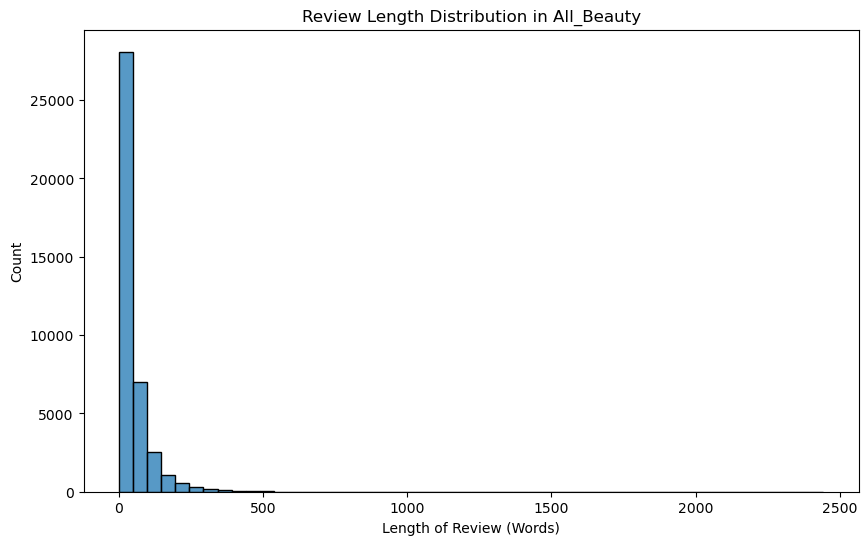

Most common words in reviewText: [('product', 11444), ('use', 11303), ('great', 10472), ('one', 9101), ('good', 7980), ('like', 7751), ('well', 6556), ('would', 6274), ('razor', 6142), ('works', 6049)]
Most common words in summary: [('stars', 8123), ('five', 6508), ('great', 5048), ('good', 2958), ('product', 2761), ('love', 1751), ('works', 1696), ('best', 1172), ('four', 1028), ('nice', 935)]
Most common characters in reviewText: [(' ', 1910215), ('e', 946537), ('t', 792076), ('a', 626208), ('i', 612569), ('o', 593133), ('s', 535484), ('r', 475616), ('n', 474351), ('h', 413981)]
Most common characters in summary: [(' ', 125059), ('e', 88177), ('t', 70801), ('s', 59723), ('r', 59296), ('a', 58438), ('o', 54172), ('i', 48973), ('n', 33642), ('l', 30999)]
Processing category: Appliances
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far: 3

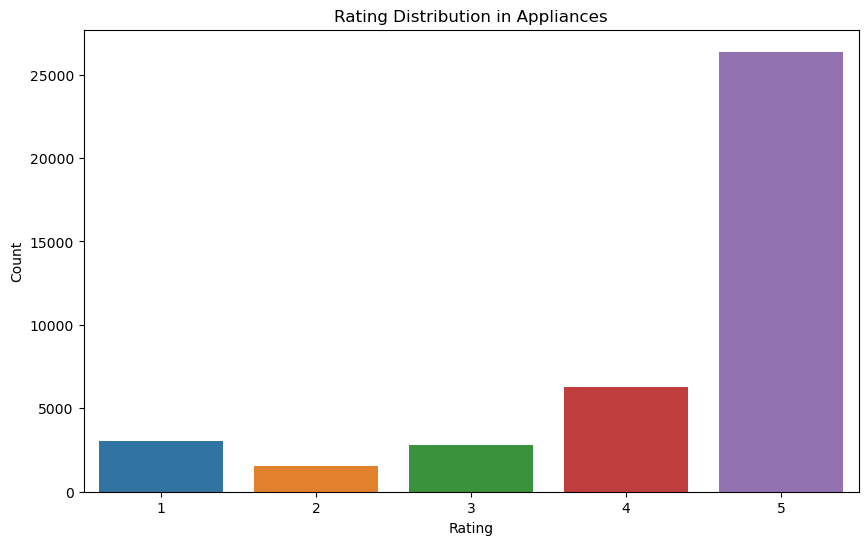

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


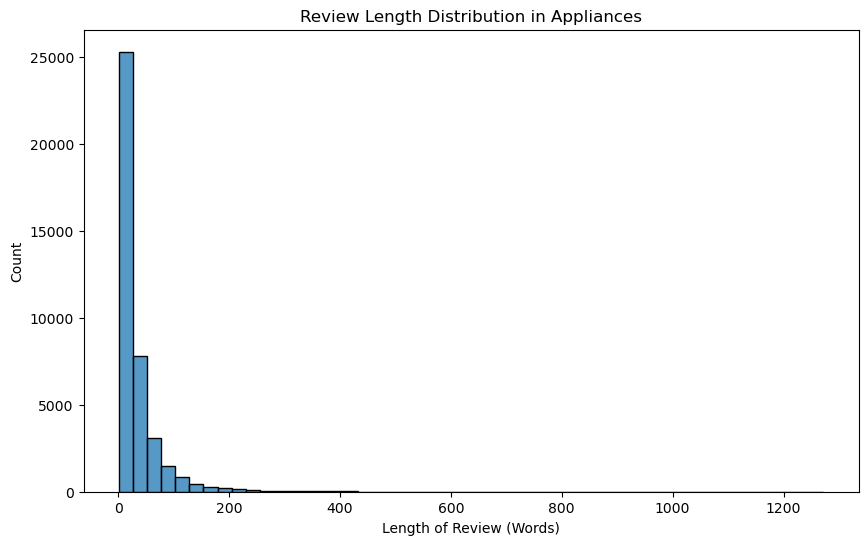

Most common words in reviewText: [('great', 8715), ('filter', 8619), ('water', 8105), ('one', 7243), ('works', 6523), ('good', 6036), ('product', 5932), ('fit', 5637), ('price', 4629), ('would', 4541)]
Most common words in summary: [('stars', 12141), ('five', 9403), ('great', 4000), ('good', 2796), ('works', 2206), ('filter', 2153), ('four', 1849), ('product', 1822), ('water', 1296), ('perfect', 1286)]
Most common characters in reviewText: [(' ', 1286632), ('e', 684995), ('t', 563363), ('i', 421416), ('a', 416063), ('o', 403656), ('r', 337997), ('s', 331886), ('n', 329941), ('h', 275325)]
Most common characters in summary: [(' ', 121263), ('e', 89907), ('t', 72958), ('r', 61490), ('s', 59174), ('a', 56763), ('i', 52209), ('o', 48591), ('n', 31689), ('f', 28144)]
Processing category: Toys_and_Games
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows process

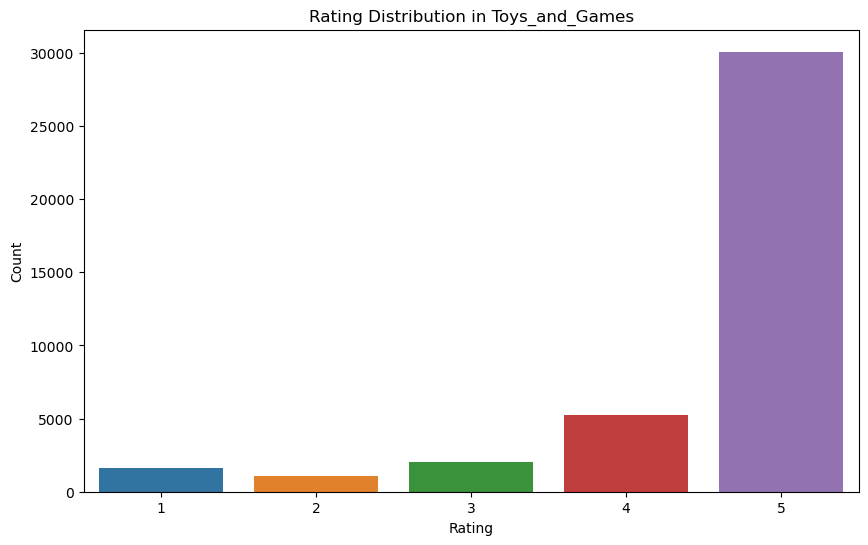

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


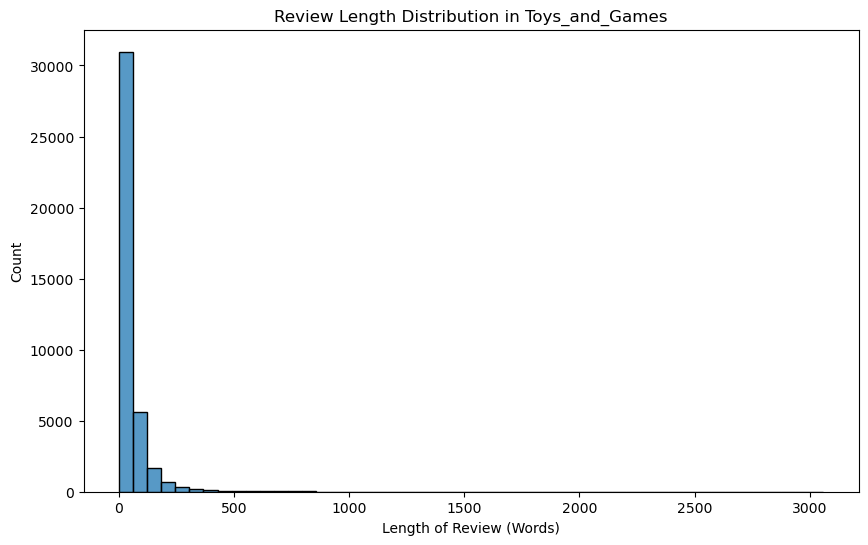

Most common words in reviewText: [('game', 36473), ('fun', 13466), ('great', 12078), ('play', 12000), ('one', 9242), ('love', 8071), ('like', 7132), ('get', 6010), ('kids', 5794), ('time', 5777)]
Most common words in summary: [('stars', 8612), ('game', 7937), ('five', 7284), ('great', 5874), ('fun', 5434), ('love', 2238), ('family', 1600), ('good', 1461), ('kids', 935), ('four', 886)]
Most common characters in reviewText: [(' ', 2040971), ('e', 1014772), ('t', 810034), ('a', 722022), ('o', 644328), ('i', 618541), ('s', 537736), ('n', 518600), ('r', 476630), ('h', 431420)]
Most common characters in summary: [(' ', 135685), ('e', 88819), ('a', 70552), ('t', 68200), ('s', 54792), ('i', 51376), ('r', 50873), ('o', 50725), ('n', 38626), ('l', 33248)]
Processing category: Arts_Crafts_and_Sewing
Error occurred: [Errno 60] Operation timed out
Error occurred after processing 0 rows.
Processing category: Grocery_and_Gourmet_Food
Processing chunk: Total rows processed so far: 0
Processing chunk: 

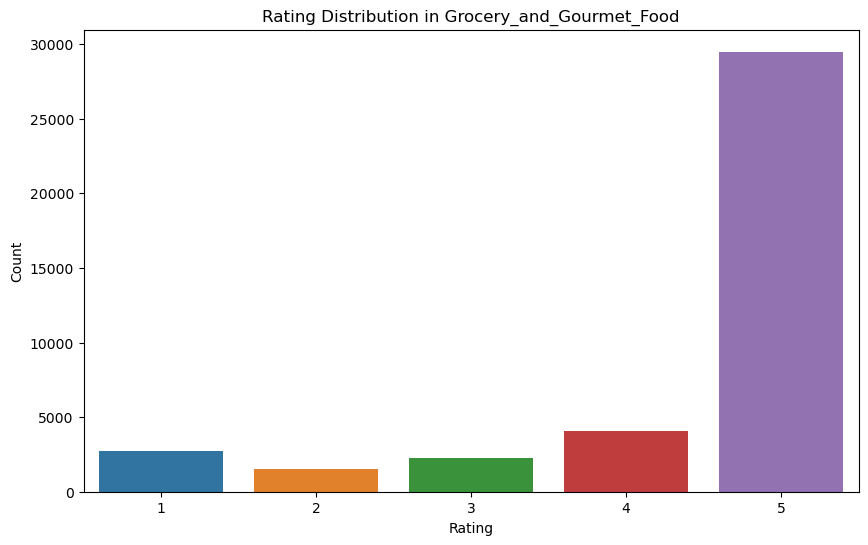

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


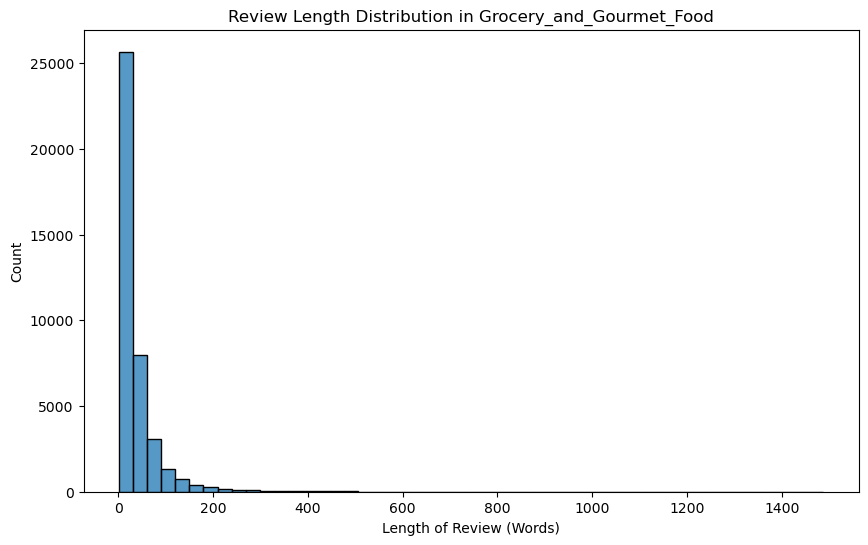

Most common words in reviewText: [('tea', 9460), ('great', 9319), ('good', 8461), ('like', 7879), ('flavor', 6392), ('love', 6278), ('taste', 6152), ('product', 5856), ('use', 5046), ('one', 4693)]
Most common words in summary: [('stars', 10490), ('five', 8629), ('great', 4032), ('good', 2830), ('tea', 2202), ('love', 1752), ('best', 1612), ('product', 1348), ('four', 1054), ('like', 1036)]
Most common characters in reviewText: [(' ', 1397617), ('e', 703327), ('t', 582967), ('a', 494673), ('i', 461256), ('o', 453823), ('s', 390112), ('n', 348844), ('r', 334212), ('h', 279702)]
Most common characters in summary: [(' ', 122070), ('e', 87394), ('t', 72054), ('a', 62266), ('s', 61691), ('o', 51700), ('i', 50796), ('r', 50210), ('n', 32218), ('l', 27945)]
Processing category: Tools_and_Home_Improvement
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows process

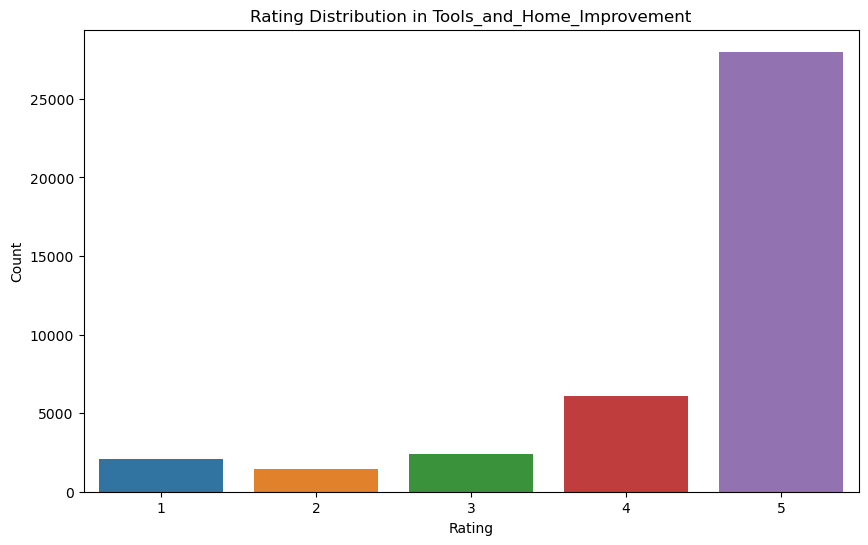

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


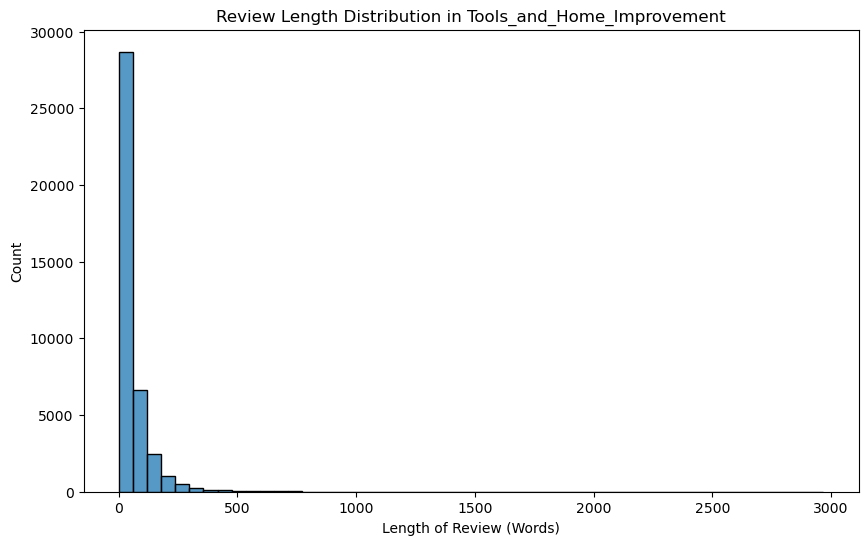

Most common words in reviewText: [('one', 12004), ('great', 11106), ('saw', 10206), ('use', 9722), ('light', 8640), ('good', 7754), ('would', 7701), ('well', 7131), ('like', 6305), ('used', 5961)]
Most common words in summary: [('stars', 8648), ('five', 7065), ('great', 5494), ('good', 2804), ('light', 1854), ('works', 1471), ('product', 1326), ('saw', 1280), ('best', 1128), ('quality', 1103)]
Most common characters in reviewText: [(' ', 2204421), ('e', 1081467), ('t', 930501), ('a', 712154), ('o', 696428), ('i', 674111), ('s', 581350), ('n', 531438), ('r', 508527), ('h', 478248)]
Most common characters in summary: [(' ', 128270), ('e', 87971), ('t', 74224), ('a', 59448), ('s', 56887), ('r', 55054), ('o', 53395), ('i', 50702), ('l', 34635), ('n', 32346)]
EDA completed for all categories.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk

nltk.download('punkt')
nltk.download('stopwords')

def load_random_sample(file_path, chunk_size, total_samples, random_state=42):
    sample = pd.DataFrame()
    total_rows = 0

    try:
        for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
            print(f"Processing chunk: Total rows processed so far: {total_rows}")  # Debugging print statement
            total_rows += len(chunk)
            if total_rows >= total_samples:
                break
            sample = pd.concat([sample, chunk.sample(n=min(len(chunk), total_samples - len(sample)), random_state=random_state)], ignore_index=True)
    except Exception as e:
        print(f"Error occurred: {e}")  # Print the exception
        print(f"Error occurred after processing {total_rows} rows.")  # Indicate how far the process went

    return sample



def plot_rating_distribution(df, category_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='overall', data=df)
    plt.title(f"Rating Distribution in {category_name}")
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

def plot_review_length_distribution(df, category_name):
    df['review_length'] = df['reviewText'].str.split().str.len()
    plt.figure(figsize=(10, 6))
    sns.histplot(df['review_length'], bins=50)
    plt.title(f"Review Length Distribution in {category_name}")
    plt.xlabel('Length of Review (Words)')
    plt.ylabel('Count')
    plt.show()

def display_most_common_words(df, column_name, num_words=10):
    text = ' '.join(df[column_name].dropna().astype(str)).lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    word_freq = Counter(tokens)
    common_words = word_freq.most_common(num_words)
    print(f"Most common words in {column_name}: {common_words}")

def display_most_common_characters(df, column_name, num_chars=10):
    text = ''.join(df[column_name].dropna().astype(str)).lower()
    char_freq = Counter(text)
    common_chars = char_freq.most_common(num_chars)
    print(f"Most common characters in {column_name}: {common_chars}")

categories = {
    'Luxury_Beauty': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Luxury_Beauty.json',
    'AMAZON_FASHION': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/AMAZON_FASHION.json',
    'Clothing_Shoes_and_Jewelry': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Clothing_Shoes_and_Jewelry.json',
    'All_Beauty': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/All_Beauty.json',
    'Appliances': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Appliances.json',
    'Toys_and_Games': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Toys_and_Games.json',
    'Arts_Crafts_and_Sewing': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Arts_Crafts_and_Sewing.json',
    'Grocery_and_Gourmet_Food': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Grocery_and_Gourmet_Food.json',
    'Tools_and_Home_Improvement': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Tools_and_Home_Improvement.json'
}

chunk_size = 10000
total_samples = 50000

for category, file_path in categories.items():
    print(f"Processing category: {category}")
    df = load_random_sample(file_path, chunk_size, total_samples)
    if not df.empty:
        plot_rating_distribution(df, category)
        plot_review_length_distribution(df, category)
        display_most_common_words(df, 'reviewText', 10)
        display_most_common_words(df, 'summary', 10)
        display_most_common_characters(df, 'reviewText', 10)
        display_most_common_characters(df, 'summary', 10)

print("EDA completed for all categories.")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading Luxury Beauty data for comparison...
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far: 30000
Processing chunk: Total rows processed so far: 40000
Processing category: AMAZON_FASHION
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far: 30000
Processing chunk: Total rows processed so far: 40000


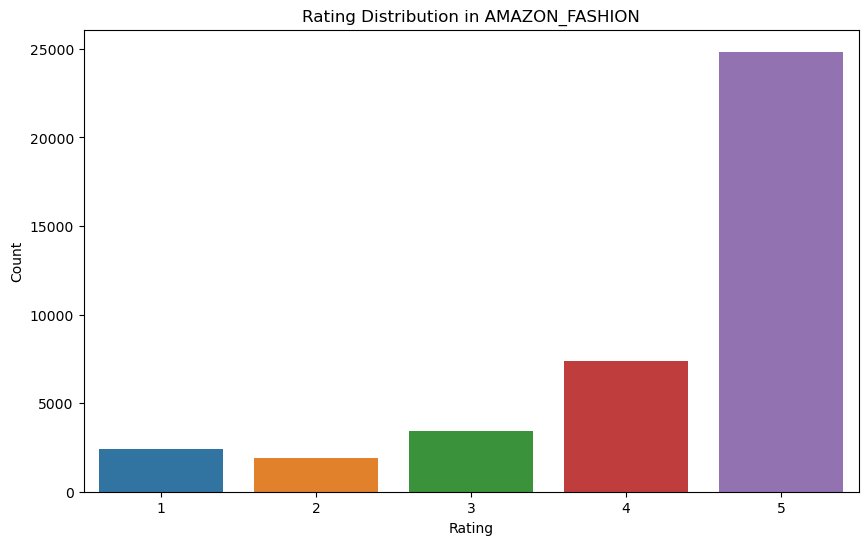

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


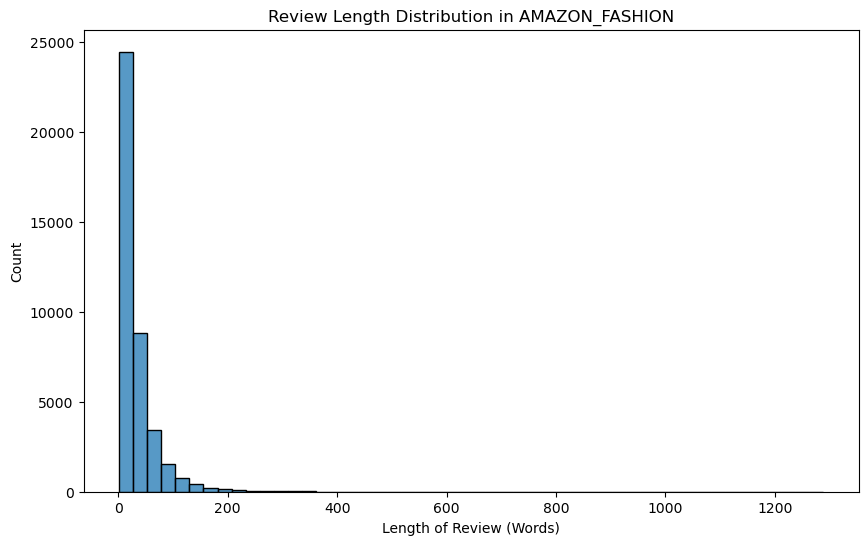

Most common words in reviewText: [('great', 9432), ('fit', 8098), ('good', 6371), ('size', 6074), ('like', 4915), ('shoes', 4803), ('well', 4742), ('love', 4724), ('would', 4639), ('wear', 4341)]
Most common characters in reviewText: [(' ', 1225304), ('e', 633037), ('t', 513362), ('a', 396584), ('o', 385790), ('i', 365748), ('s', 329845), ('r', 298745), ('h', 283485), ('n', 282519)]
Processing category: Clothing_Shoes_and_Jewelry
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far: 30000
Processing chunk: Total rows processed so far: 40000


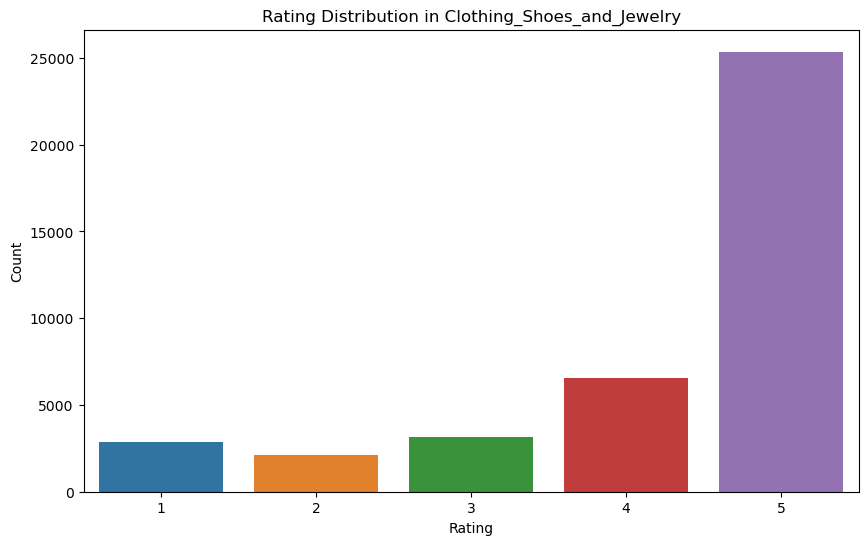

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


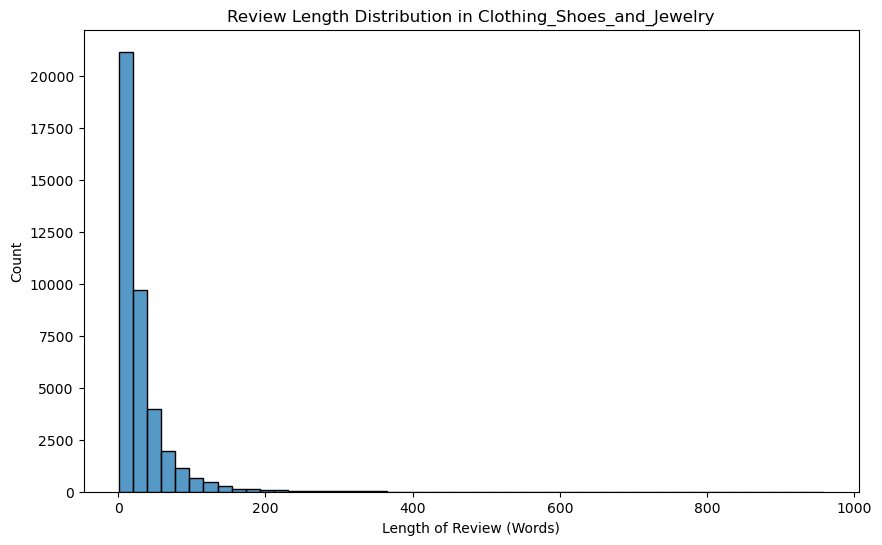

Most common words in reviewText: [('great', 8871), ('fit', 8310), ('size', 8092), ('shoes', 7482), ('love', 6236), ('like', 5403), ('good', 5300), ('wear', 5262), ('comfortable', 4685), ('pair', 4193)]
Most common characters in reviewText: [(' ', 1161880), ('e', 604023), ('t', 470860), ('a', 376698), ('o', 371834), ('i', 338593), ('s', 314079), ('r', 287874), ('h', 265620), ('n', 262967)]
Processing category: All_Beauty
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far: 30000
Processing chunk: Total rows processed so far: 40000


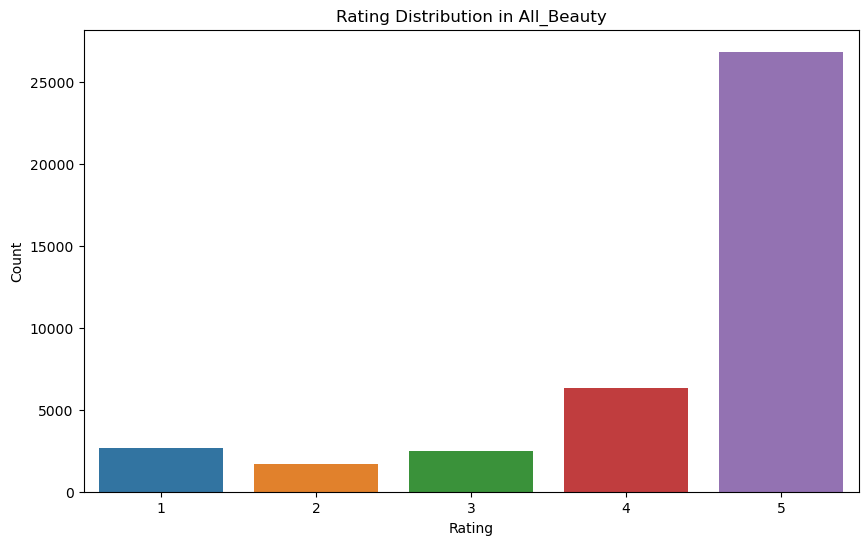

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


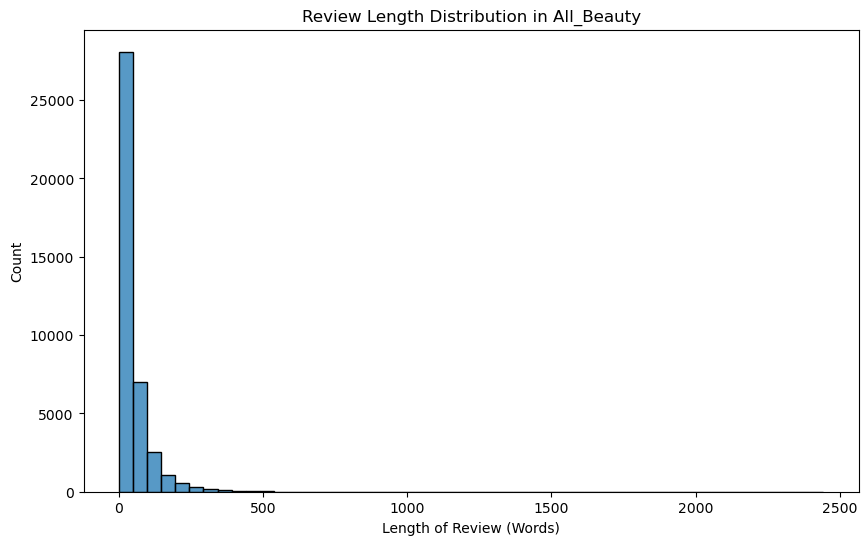

Most common words in reviewText: [('product', 11444), ('use', 11303), ('great', 10472), ('one', 9101), ('good', 7980), ('like', 7751), ('well', 6556), ('would', 6274), ('razor', 6142), ('works', 6049)]
Most common characters in reviewText: [(' ', 1910215), ('e', 946537), ('t', 792076), ('a', 626208), ('i', 612569), ('o', 593133), ('s', 535484), ('r', 475616), ('n', 474351), ('h', 413981)]
Processing category: Appliances
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far: 30000
Processing chunk: Total rows processed so far: 40000


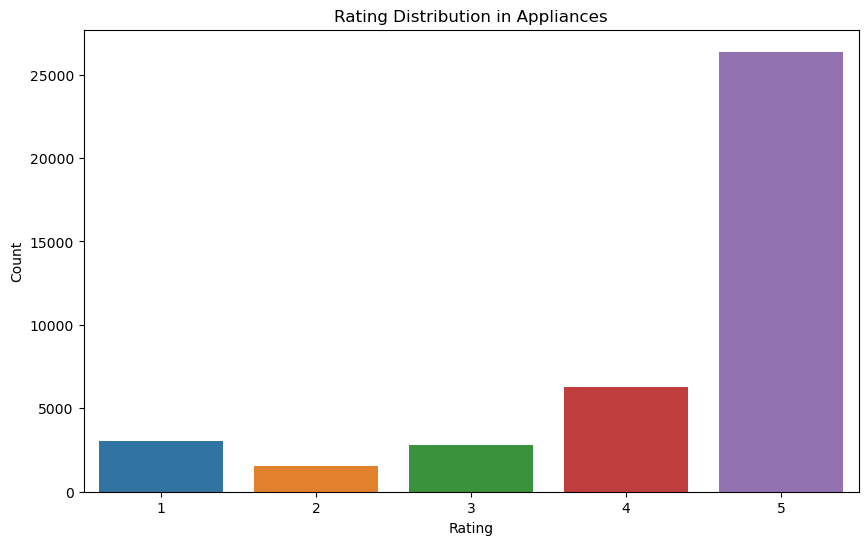

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


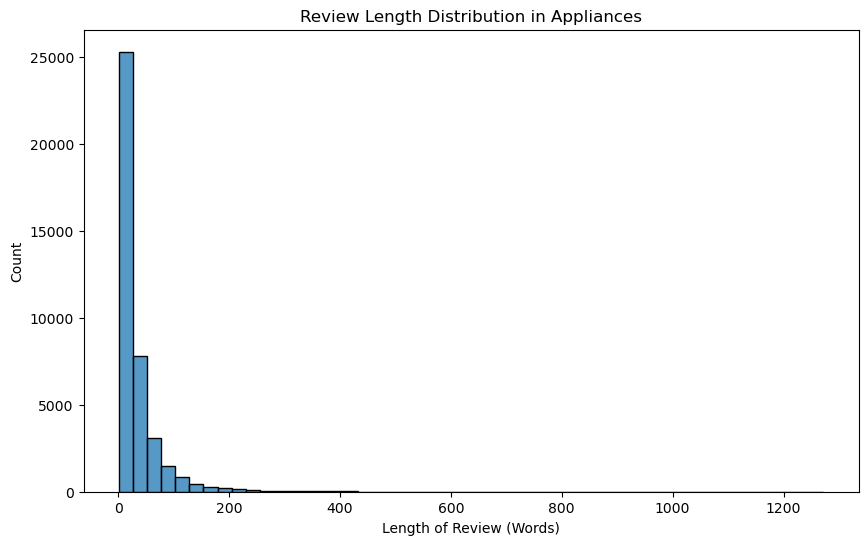

Most common words in reviewText: [('great', 8715), ('filter', 8619), ('water', 8105), ('one', 7243), ('works', 6523), ('good', 6036), ('product', 5932), ('fit', 5637), ('price', 4629), ('would', 4541)]
Most common characters in reviewText: [(' ', 1286632), ('e', 684995), ('t', 563363), ('i', 421416), ('a', 416063), ('o', 403656), ('r', 337997), ('s', 331886), ('n', 329941), ('h', 275325)]
Processing category: Toys_and_Games
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far: 30000
Processing chunk: Total rows processed so far: 40000


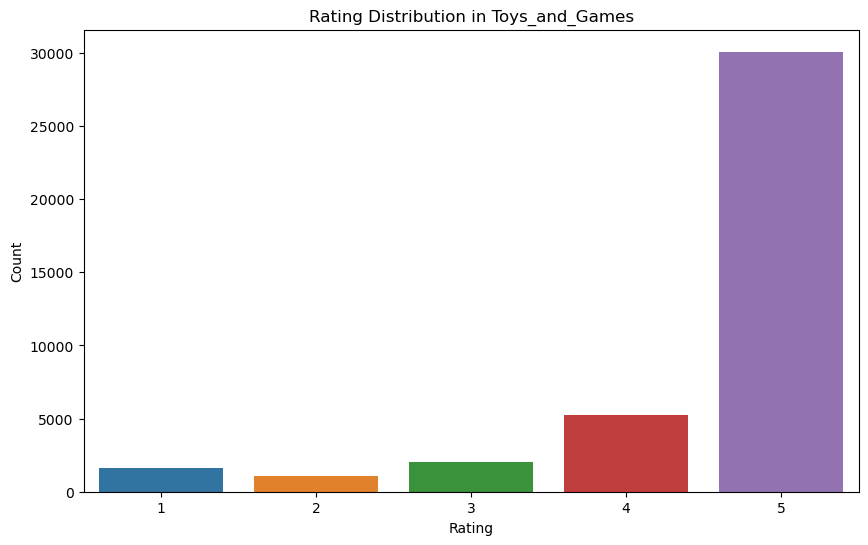

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


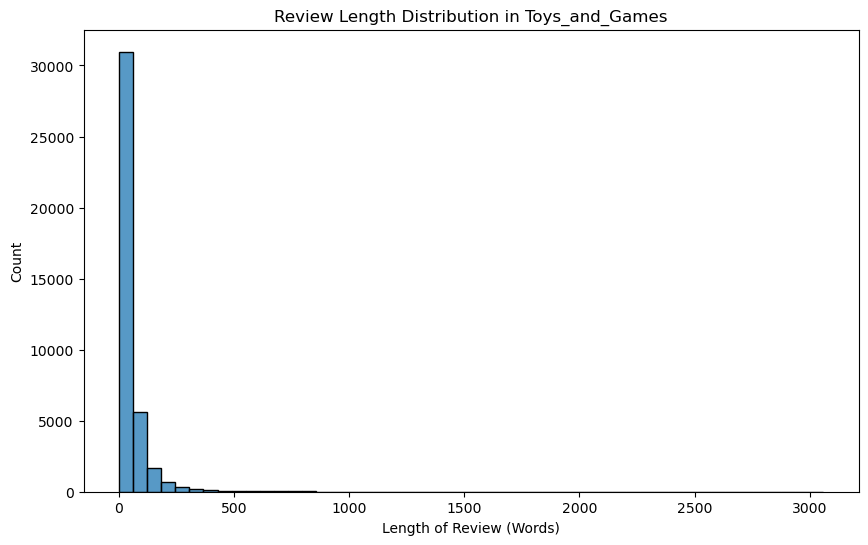

Most common words in reviewText: [('game', 36473), ('fun', 13466), ('great', 12078), ('play', 12000), ('one', 9242), ('love', 8071), ('like', 7132), ('get', 6010), ('kids', 5794), ('time', 5777)]
Most common characters in reviewText: [(' ', 2040971), ('e', 1014772), ('t', 810034), ('a', 722022), ('o', 644328), ('i', 618541), ('s', 537736), ('n', 518600), ('r', 476630), ('h', 431420)]
Processing category: Arts_Crafts_and_Sewing
Error occurred: [Errno 60] Operation timed out
Error occurred after processing 0 rows.
Processing category: Grocery_and_Gourmet_Food
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far: 30000
Processing chunk: Total rows processed so far: 40000


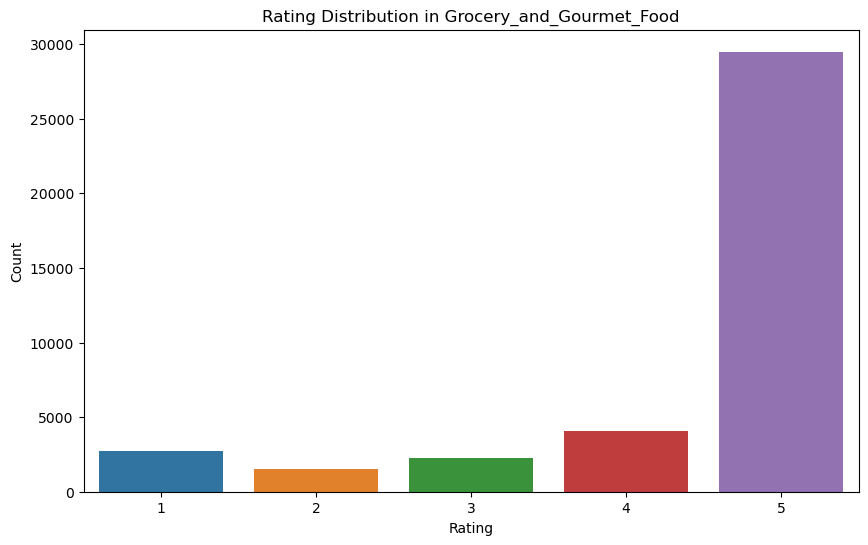

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


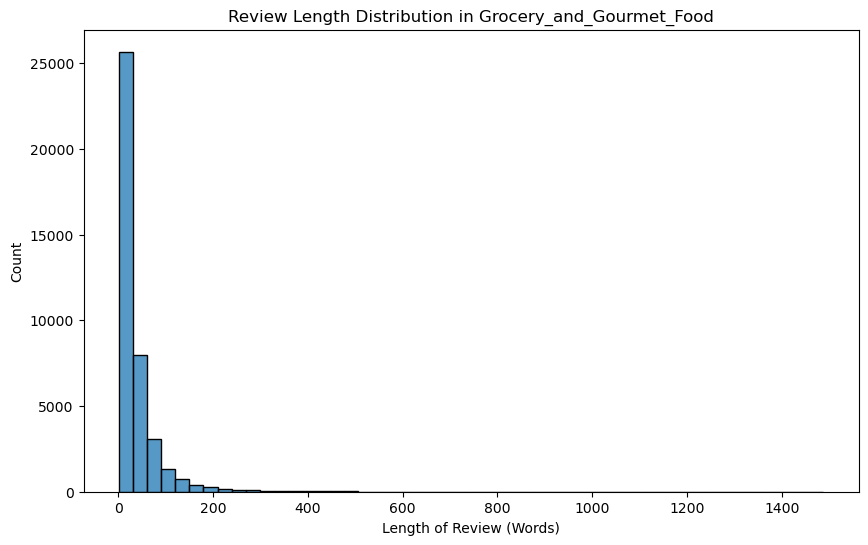

Most common words in reviewText: [('tea', 9460), ('great', 9319), ('good', 8461), ('like', 7879), ('flavor', 6392), ('love', 6278), ('taste', 6152), ('product', 5856), ('use', 5046), ('one', 4693)]
Most common characters in reviewText: [(' ', 1397617), ('e', 703327), ('t', 582967), ('a', 494673), ('i', 461256), ('o', 453823), ('s', 390112), ('n', 348844), ('r', 334212), ('h', 279702)]
Processing category: Tools_and_Home_Improvement
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far: 30000
Processing chunk: Total rows processed so far: 40000


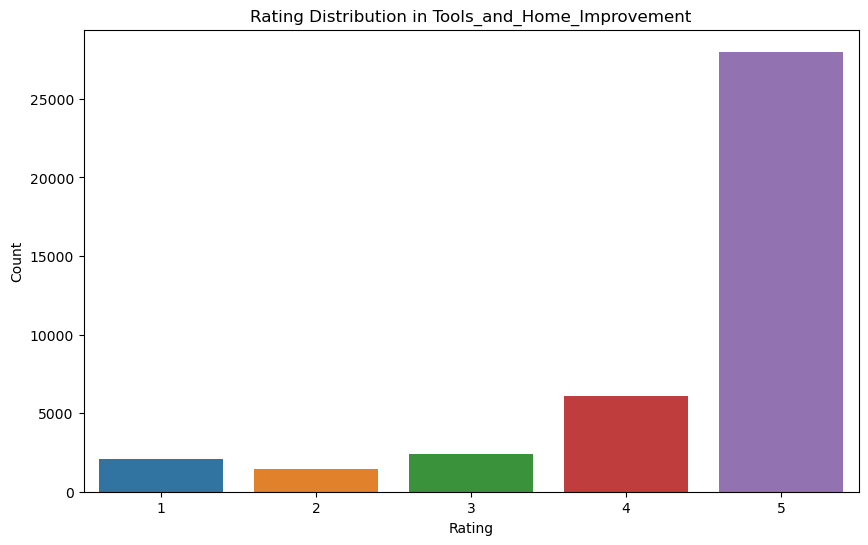

/Users/patrickbendorffschwebel/opt/anaconda3/envs/amlfall23/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


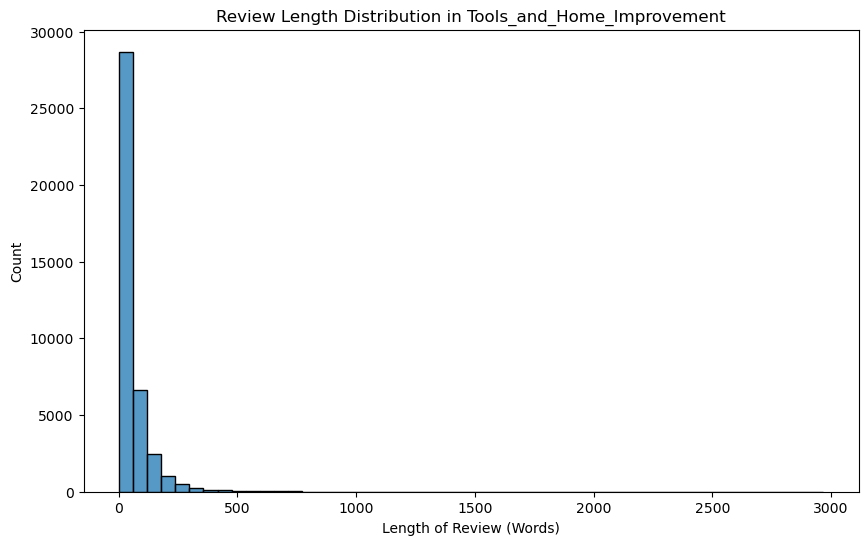

Most common words in reviewText: [('one', 12004), ('great', 11106), ('saw', 10206), ('use', 9722), ('light', 8640), ('good', 7754), ('would', 7701), ('well', 7131), ('like', 6305), ('used', 5961)]
Most common characters in reviewText: [(' ', 2204421), ('e', 1081467), ('t', 930501), ('a', 712154), ('o', 696428), ('i', 674111), ('s', 581350), ('n', 531438), ('r', 508527), ('h', 478248)]
Processing category: AMAZON_FASHION
Processing chunk: Total rows processed so far: 0
Processing chunk: Total rows processed so far: 10000
Processing chunk: Total rows processed so far: 20000
Processing chunk: Total rows processed so far: 30000
Processing chunk: Total rows processed so far: 40000
Words unique to Luxury Beauty: {'product', 'one', 'use', 'color', 'skin', 'hair'}
Words unique to AMAZON_FASHION: {'shoes', 'fit', 'size', 'would', 'well', 'wear'}
Characters unique to Luxury Beauty: set()
Characters unique to AMAZON_FASHION: set()
Processing category: Clothing_Shoes_and_Jewelry
Processing chunk: 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

# Function to load a random sample from a JSON file
def load_random_sample(file_path, chunk_size, total_samples, random_state=42):
    sample = pd.DataFrame()
    total_rows = 0
    try:
        for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
            print(f"Processing chunk: Total rows processed so far: {total_rows}")
            total_rows += len(chunk)
            if total_rows >= total_samples:
                break
            sample = pd.concat([sample, chunk.sample(n=min(len(chunk), total_samples - len(sample)), random_state=random_state)], ignore_index=True)
    except Exception as e:
        print(f"Error occurred: {e}")
        print(f"Error occurred after processing {total_rows} rows.")
    return sample

# Function to plot rating distribution
def plot_rating_distribution(df, category_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='overall', data=df)
    plt.title(f"Rating Distribution in {category_name}")
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

# Function to plot review length distribution
def plot_review_length_distribution(df, category_name):
    df['review_length'] = df['reviewText'].str.split().str.len()
    plt.figure(figsize=(10, 6))
    sns.histplot(df['review_length'], bins=50)
    plt.title(f"Review Length Distribution in {category_name}")
    plt.xlabel('Length of Review (Words)')
    plt.ylabel('Count')
    plt.show()

# Function to display most common words
def display_most_common_words(df, column_name, num_words=10):
    text = ' '.join(df[column_name].dropna().astype(str)).lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    word_freq = Counter(tokens)
    common_words = word_freq.most_common(num_words)
    print(f"Most common words in {column_name}: {common_words}")

# Function to display most common characters
def display_most_common_characters(df, column_name, num_chars=10):
    text = ''.join(df[column_name].dropna().astype(str)).lower()
    char_freq = Counter(text)
    common_chars = char_freq.most_common(num_chars)
    print(f"Most common characters in {column_name}: {common_chars}")

def plot_distribution_comparison(df1, df2, category1, category2, column, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(df1[column], shade=True, label=category1)
    sns.kdeplot(df2[column], shade=True, label=category2)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
# Dictionary mapping categories to file paths
categories = {
   'Luxury_Beauty': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Luxury_Beauty.json',
    'AMAZON_FASHION': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/AMAZON_FASHION.json',
    'Clothing_Shoes_and_Jewelry': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Clothing_Shoes_and_Jewelry.json',
    'All_Beauty': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/All_Beauty.json',
    'Appliances': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Appliances.json',
    'Toys_and_Games': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Toys_and_Games.json',
    'Arts_Crafts_and_Sewing': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Arts_Crafts_and_Sewing.json',
    'Grocery_and_Gourmet_Food': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Grocery_and_Gourmet_Food.json',
    'Tools_and_Home_Improvement': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Tools_and_Home_Improvement.json'
}


# Settings for chunk size and total samples
chunk_size = 10000
total_samples = 50000

# Load Luxury Beauty data for comparison
print("Loading Luxury Beauty data for comparison...")
luxury_beauty_df = load_random_sample(categories['Luxury_Beauty'], chunk_size, total_samples)

# Compare other categories to Luxury Beauty
for category, file_path in categories.items():
    if category == 'Luxury_Beauty':  # Skip Luxury Beauty since it's our standard
        continue
    print(f"Processing category: {category}")
    df = load_random_sample(file_path, chunk_size, total_samples)
    if not df.empty:
        plot_rating_distribution(df, category)
        plot_review_length_distribution(df, category)
        display_most_common_words(df, 'reviewText', 10)
        display_most_common_characters(df, 'reviewText', 10)
        
        
        
# Function to compare common words between two dataframes
def compare_common_words(df1, df2, category1, category2):
    words1 = Counter([word for review in df1['reviewText'].dropna() for word in word_tokenize(review.lower()) if word.isalpha() and word not in stopwords.words('english')])
    words2 = Counter([word for review in df2['reviewText'].dropna() for word in word_tokenize(review.lower()) if word.isalpha() and word not in stopwords.words('english')])
    
    common_words1 = set([word for word, freq in words1.most_common(10)])
    common_words2 = set([word for word, freq in words2.most_common(10)])
    
    unique_to_df1 = common_words1 - common_words2
    unique_to_df2 = common_words2 - common_words1
    
    print(f"Words unique to {category1}: {unique_to_df1}")
    print(f"Words unique to {category2}: {unique_to_df2}")

# Function to compare common characters between two dataframes
def compare_common_characters(df1, df2, category1, category2):
    chars1 = Counter(''.join(df1['reviewText'].dropna().astype(str)).lower())
    chars2 = Counter(''.join(df2['reviewText'].dropna().astype(str)).lower())
    
    common_chars1 = set([char for char, freq in chars1.most_common(10)])
    common_chars2 = set([char for char, freq in chars2.most_common(10)])
    
    unique_to_df1 = common_chars1 - common_chars2
    unique_to_df2 = common_chars2 - common_chars1
    
    print(f"Characters unique to {category1}: {unique_to_df1}")
    print(f"Characters unique to {category2}: {unique_to_df2}")

# Compare other categories to Luxury Beauty
luxury_beauty_words = Counter([word for review in luxury_beauty_df['reviewText'].dropna() for word in word_tokenize(review.lower()) if word.isalpha() and word not in stopwords.words('english')])
luxury_beauty_chars = Counter(''.join(luxury_beauty_df['reviewText'].dropna().astype(str)).lower())

for category, file_path in categories.items():
    if category == 'Luxury_Beauty':
        continue
    print(f"Processing category: {category}")
    df = load_random_sample(file_path, chunk_size, total_samples)
    if not df.empty:
        compare_common_words(luxury_beauty_df, df, 'Luxury Beauty', category)
        compare_common_characters(luxury_beauty_df, df, 'Luxury Beauty', category)

print("Comparison completed.")
        

print("Comparison completed.")
